# Menyelesaikan Permasalahan Human Resource

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Business Understanding

 Permasalahan yang terjadi adalah masih cukup kesulitan dalam mengelola karyawan. Hal ini berimbas tingginya attrition rate (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%.

Dari permasalahan ini, dibutuhkan identifikasi berbagai faktor yang mempengaruhi tingginya attrition rate tersebut.

Pertanyaan Bisnis : Apa faktor utama yang mempengaruhi attrition rate?



## Data Understanding

Dataset yang digunakan terdiri dari 34 feature atau kolom seperti
berikut.
*   EmployeeId : kolom ini berisi Id Karyawan yang bersifat unik.
*   Age : kolom ini berisi usia setiap Karyawan
*   Attrition : kolom ini berisi status pengurangan karyawan (0=tidak, 1=ya)
*   BusinessTravel : kolom ini berisi tingkat kewajiban perjalanan dalam pekerjaan (Travel_Rarely, Travel_Frequently, Non-Travel)
*   DailyRate : kolom ini memuat informasi gaji harian
*   Department : kolom ini berisi asal departemen karyawan (Research & Development, Sales, Human Resources)
*   DistanceFromHome : kolom ini berisi jarak dari tempat kerja ke rumah (dalam km)
*   Education : kolom ini berisi pendidikan karyawan 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
*   EducationField : kolom ini berisi bidang pendidikan (Life Sciences,
Medical, Marketing, Technical Degree, Other, Human Resources)
*   EmployeeCount :
*   EnvironmentSatisfaction : kolom ini berisi tingkat kepuasan terhadap lingkungan (1-Low, 2-Medium, 3-High, 4-Very High)
*   Gender : kolom ini berisi gender setiap karyawan
*   Hourly Rate : kolom ini berisi informasi gaji per jam
*   JobInvolvement : kolom ini berisi gender setiap karyawan
*   JobLevel : kolom ini berisi tingkatan pekerjaan(1 to 5)
*   JobSatisfaction : kolom ini berisi tingkat kepuasan terhadap pekerjaan (1-Low, 2-Medium, 3-High, 4-Very High)
*   MaritalStatus : kolom ini berisi status pernikahan (Married, Single, Divorced)
*   MonthlyIncome : kolom ini berisi informasi gaji per bulan
*   MonthlyRate : kolom ini berisi informasi gaji pokok per bulan
*   NumCompaniesWorked : kolom ini berisi jumlah perusahaan tempat karyawan pernah bekerja selama kariernya
*   Over18 : kolom ini berisi jawaban dari pertanyaan apakah usia karyawan diatas 18
*   OverTime : kolom ini berisi jawaban dari pertanyaan apakah lembur
*   PercentSalaryHike : kolom ini berisi persentase kenaikan gaji tahun lalu
*   PerformanceRating : kolom ini berisi penilaian atau rating kinerja karyawan (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
*  RelationshipSatisfaction  : kolom ini berisi tingkat kepuasan terhadap hubungan (1-Low, 2-Medium, 3-High, 4-Very High)
*  StandardHours : kolom ini berisi jumlah jam kerja standar      
*  StockOptionLevel : kolom ini berisi tingkat opsi saham yang dimiliki     
*  TotalWorkingYears : kolom ini berisi jumlah tahun kerja
*  TrainingTimesLastYear :kolom ini berisi  jumlah kali karyawan mengikuti pelatihan
*  WorkLifeBalance  : kolom ini berisi tingkat keseimbangan antara pekerjaan dan kehidupan pribadi (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
*  YearsAtCompany : kolom ini berisi  jumlah tahun telah bekerja di perusahaan
*  YearsInCurrentRole : kolom ini berisi jumlah menempati jabatan
*  YearsSinceLastPromotion : kolom ini berisi tahun kenaikan jabatan terakhir kali
*  YearsWithCurrManager: kolom ini berisi jumlah tahun bekerja dengan  manajer saat ini.


## Data Preparation / Preprocessing

### Gathering Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv", encoding='windows-1252')
data.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


### Accessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

terdapat kesalahan tipe data untuk feature Attrition harusnya direpresentasikan sebagai tipe data object bukan float

In [ ]:
# numerical Feature
data.select_dtypes(np.number).head(5)

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,1444,1,4,1,4,88,3,1,2,2991,5224,0,11,3,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,1141,11,2,1,1,61,1,2,2,4777,14382,5,15,3,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,1323,4,4,1,1,34,3,1,3,2461,10332,9,12,3,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,555,26,3,1,3,77,3,4,2,13525,14864,5,14,3,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,1194,2,4,1,3,98,3,1,3,2001,12549,2,14,3,2,80,3,20,2,3,5,3,0,2


In [ ]:
# categorical feature
data.select_dtypes(include="O").head(5)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Frequently,Human Resources,Other,Male,Human Resources,Married,Y,Yes
1,Travel_Rarely,Research & Development,Medical,Female,Healthcare Representative,Married,Y,No
2,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,Yes
3,Travel_Frequently,Sales,Marketing,Female,Sales Executive,Married,Y,No
4,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Married,Y,No


In [ ]:
# Descriptive Analysis on Numerical Attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


*   Standard deviation dari EmployeeCount dan StandardHours adalah 0 yang mengindikasikan bahwa semua nilai yang ada dalam atribut ini identik atau sama
*   Atribut EmployeeId mewakili nilai unik untuk setiap karyawan, yang tidak akan memberikan wawasan yang bermakna



In [ ]:
# Descriptive Analysis for categorical attributes
data.describe(include="O").T

,count,unique,top,freq
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


*   Pada kolom over18 hanya ada 1 unique value
*   OverTime adalah kolom yang memiliki bias yang tinggi (kecenderungan terhadapy Y)



In [ ]:
# cek missing value
data.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Berdasarkan informasi diatas, terdapat 412 missing values pada kolom Attrition

In [ ]:
# cek duplicated data
data.duplicated().sum()

0

tidak ada duplicated value

### cleaning data

In [ ]:
# drop missing value

data.dropna(axis=0, how="any", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EmployeeCount             1058 non-null   int64  
 10  EnvironmentSatisfaction   1058 non-null   int64  
 11  Gender                    1058 non-null   object 
 12  HourlyRate                1058 non-null   int64  
 13  JobInvolvement            1058 non-null   int64  
 14  JobLevel

In [ ]:
# cek missing value
data.isnull().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

drop column yang tidak memiliki meaningful insights

In [ ]:
col = ["Over18","EmployeeCount","EmployeeId","StandardHours"]
data.drop(columns=col, inplace=True)

replace those labelled numerical values with appropriate categorical values.


In [ ]:
data["Attrition"] = data["Attrition"].replace({0:"No", 1:"Yes"})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   object
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction         

### Exploratory Data Analysis

visualisasi target variabel

Text(0.5, 1.0, 'Number of Employees Stayed vs Left')

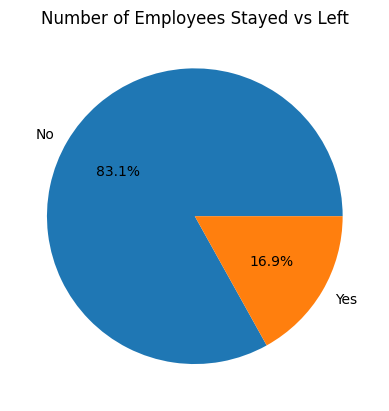

In [ ]:
attrition_counts = data["Attrition"].value_counts()
fig, ax = plt.subplots()
ax.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%')
plt.title("Number of Employees Stayed vs Left")

Berdasarkan informasi tersebut, dari total keseluruhan karyawan proporsi karyawan yang keluar adalah 16.9% dan proporsi karyawan yang masih stay adalah 83.1%. Attrition memiliki bias yang tinggi (kecenderungan atau dominasi terhadap kategori "No"), perlu untuk balance data menggunakan some statistical methods

**Demografi Karyawan**

Attrition berdasarkan Departemen

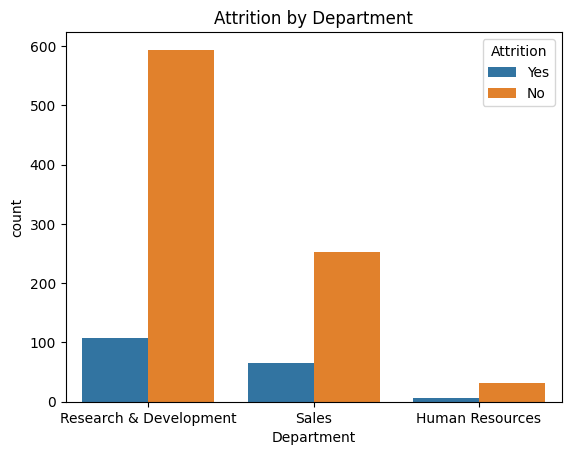

In [ ]:
sns.countplot(x ='Department', hue= 'Attrition', data = data)
plt.title("Attrition by Department")
plt.show()

Berdasarkan data diatas, departemen yang paling banyak memiliki jumlah karyawan yang keluar adalah Research and Development, selanjutnya Sales Departemen  dan yang paling rendah adalah Human Resource

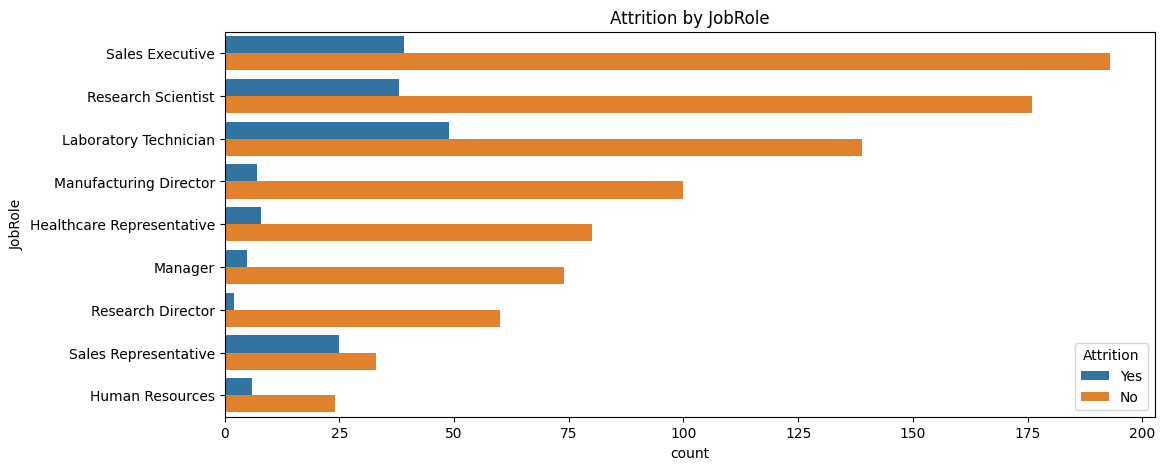

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(y='JobRole', hue='Attrition', data=data, order=data['JobRole'].value_counts().index)
plt.title("Attrition by JobRole")
plt.show()

Berdasarkan informasi diatas, job role dengan karyawan yang jumlah keluarnya paling tinggi yaitu sebagai Laboratory Technician, sedangkan job role dengan karyawan yang jumlah keluarnya paling sedikit adalah Research Director

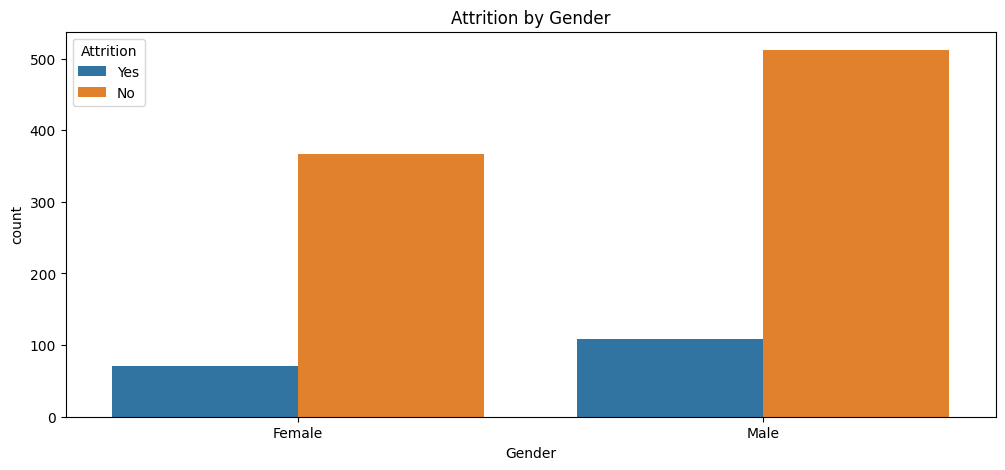

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x ='Gender', hue= 'Attrition', data = data)
plt.title("Attrition by Gender")
plt.show()

jumlah kasus pengunduran diri (Attrition) karyawan pria ebih tinggi dibandingkan dengan karyawan wanita

## Model

### Label Encoding

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   object
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EnvironmentSatisfaction   1058 non-null   int64 
 9   Gender                    1058 non-null   object
 10  HourlyRate                1058 non-null   int64 
 11  JobInvolvement            1058 non-null   int64 
 12  JobLevel                  1058 non-null   int64 
 13  JobRole                   1058 non-null   object
 14  JobSatisfaction         

In [ ]:
data["Attrition"] = data["Attrition"].replace({'No' : 0, "Yes" : 1})

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoding_cols = ["OverTime", "Gender", "Department", "BusinessTravel", "EducationField", "JobRole", "MaritalStatus"]
label_encoders = {}
for column in encoding_cols:
  label_encoders[column] = LabelEncoder()
  data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,37,1,2,1141,1,11,2,3,1,0,61,1,2,0,2,1,4777,14382,5,0,15,3,1,0,15,2,1,1,0,0,0
2,51,1,2,1323,1,4,4,1,1,1,34,3,1,6,3,1,2461,10332,9,1,12,3,3,3,18,2,4,10,0,2,7
3,42,0,1,555,2,26,3,2,3,0,77,3,4,7,2,1,13525,14864,5,0,14,3,4,1,23,2,4,20,4,4,8
6,40,0,2,1124,2,1,2,3,2,1,57,1,2,7,4,1,7457,13273,2,1,22,4,3,3,6,2,2,4,3,0,2
7,55,1,2,725,1,2,3,3,4,1,78,3,5,3,1,1,19859,21199,5,1,13,3,4,1,24,2,3,5,2,1,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1058 non-null   int64
 1   Attrition                 1058 non-null   int64
 2   BusinessTravel            1058 non-null   int64
 3   DailyRate                 1058 non-null   int64
 4   Department                1058 non-null   int64
 5   DistanceFromHome          1058 non-null   int64
 6   Education                 1058 non-null   int64
 7   EducationField            1058 non-null   int64
 8   EnvironmentSatisfaction   1058 non-null   int64
 9   Gender                    1058 non-null   int64
 10  HourlyRate                1058 non-null   int64
 11  JobInvolvement            1058 non-null   int64
 12  JobLevel                  1058 non-null   int64
 13  JobRole                   1058 non-null   int64
 14  JobSatisfaction           1058 non-null 

In [430]:
data.to_csv("data.csv")

### Pisahkan Atribut dan Target

In [ ]:
X = data.drop('Attrition', axis=1)
y = data["Attrition"].values

## Resampling

Penanganan Class Imbalance

menggunakan OverSampling karena jumlah datanya sedikit



In [ ]:
print(Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(Counter(y_res))

Counter({0: 879, 1: 179})
Counter({1: 879, 0: 879})


### Spliting data into Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1406, 30)
(1406,)
(352, 30)
(352,)


### Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
prediction = model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, prediction)
print('Accuracy Score', accuracy_score(y_test, prediction))

Accuracy Score 0.6534090909090909


Text(158.22222222222223, 0.5, 'Expected')

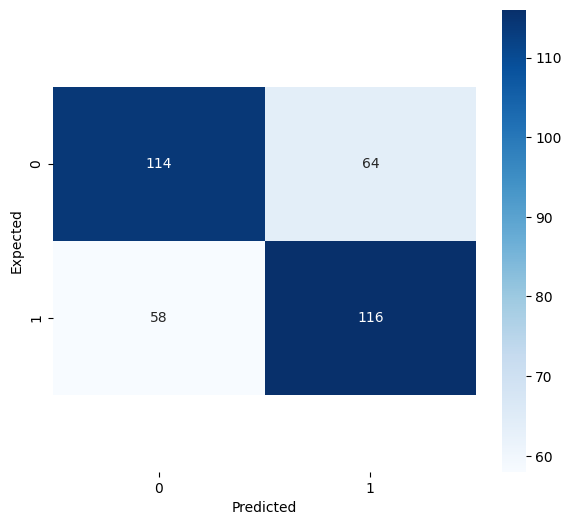

In [ ]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap='Blues', fmt='d')
bottom, top = ax1.get_ylim()
ax1.set_ylim(bottom + 0.5, top-0.5)
plt.xlabel('Predicted')
plt.ylabel('Expected')

*   True Positif : 114 (Actual : Yes, Predict : Yes)
*   False Negative : 58 (Actual : Yes, Predict : No)
*   False Positif : 64 (Actual : No, Predict : Yes)
*   True Negative : 116 (Actual : No, Predict : No)

## Random Forest

Dependent (Target) and Independent Variabel

In [ ]:
X = data.drop('Attrition', axis=1)
y = data["Attrition"].values

In [ ]:
print(Counter(y))
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(Counter(y_res))

Counter({0: 879, 1: 179})
Counter({1: 879, 0: 879})


Spliting data into Training and Testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 42)

Feature Scaling

In [ ]:
std_scaler = StandardScaler()
xtrain_scaled = std_scaler.fit_transform(X_train)
xtest_scaled = std_scaler.fit_transform(X_test)

In [ ]:
xtrain_scaled
xtest_scaled

array([[-1.53891193,  0.65023729, -1.70905194, ..., -1.12025136,
        -0.67857905, -1.06448731],
       [ 1.36912453, -0.92826979, -1.33457869, ...,  0.89898737,
        -0.38549951,  0.85845751],
       [ 0.56690758,  0.65023729,  1.3641252 , ...,  3.20668878,
         3.71761409,  1.13316391],
       ...,
       [ 2.07106437,  0.65023729, -0.93014758, ...,  0.03359935,
         0.49373912, -0.2403681 ],
       [ 0.6671847 , -0.92826979, -0.83028805, ...,  1.47591272,
         3.131455  ,  2.78140234],
       [ 0.6671847 ,  0.65023729, -0.86024591, ...,  0.6105247 ,
         3.131455  ,  0.85845751]])

model development

In [ ]:
model = RandomForestClassifier()

In [ ]:
# model training
model.fit(xtrain_scaled, y_train)

RandomForestClassifier()

In [ ]:
# model prediction
y_pred = model.predict(xtest_scaled)

In [ ]:
# model evaluation
confusion_matrix = confusion_matrix(y_test, y_pred)

<Axes: >

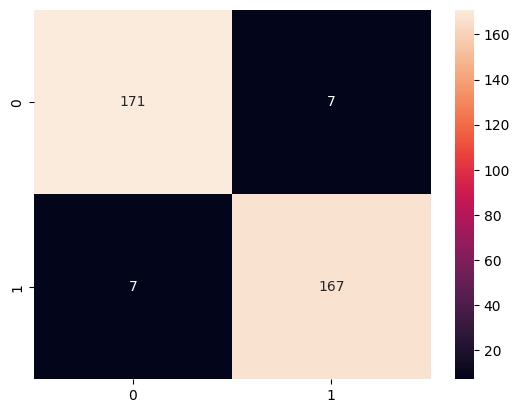

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')

In [ ]:
model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print("Accuracy Score of Model: ", model_accuracy)
print("Precision Score of Model: ", model_precision)
print("Recall Score of Model: ", model_recall)
print("F1 Score of Model: ", f1_score)

Accuracy Score of Model:  0.9602272727272727
Precision Score of Model:  0.9597701149425287
Recall Score of Model:  0.9597701149425287
F1 Score of Model:  0.9597701149425287


classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       178
           1       0.96      0.96      0.96       174

    accuracy                           0.96       352
   macro avg       0.96      0.96      0.96       352
weighted avg       0.96      0.96      0.96       352



Feature Important Metrix in Random Forest/ Feature Extraction

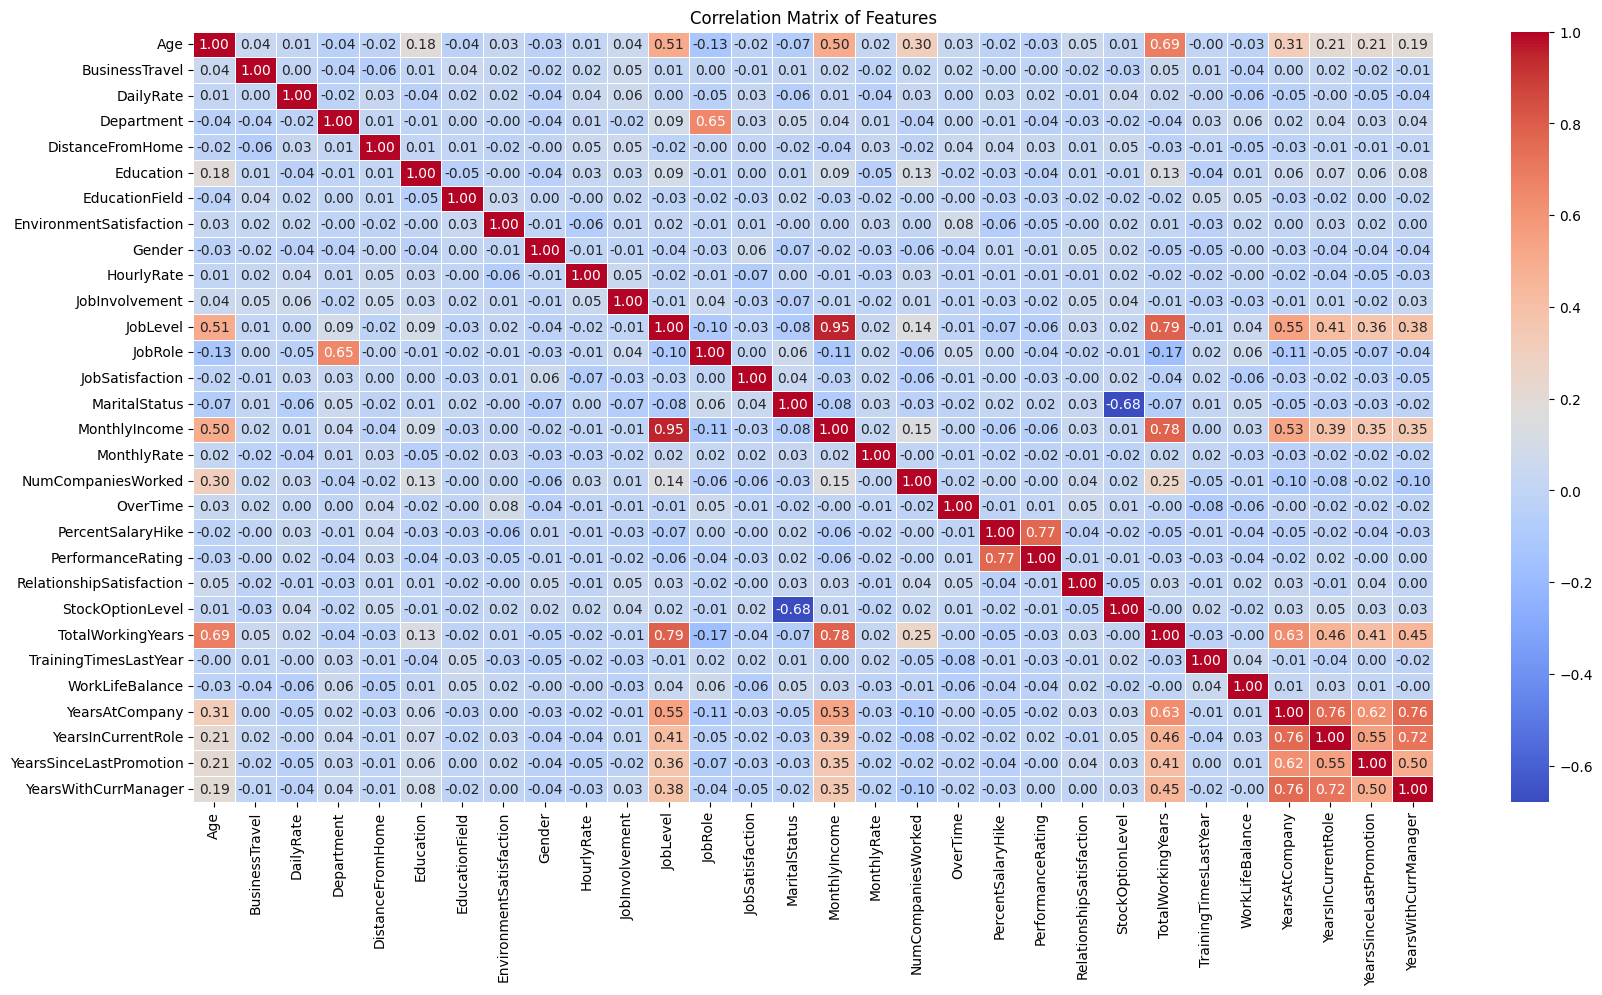

In [429]:
correlation_matrix = X.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
score_list = model.feature_importances_
list_of_feature = list(X.columns)
score_df = pd.DataFrame({"Feature" : list_of_feature, 'Score' : score_list})
score_df.sort_values(by='Score', ascending=False)

,Feature,Score
18,OverTime,0.075979
15,MonthlyIncome,0.068938
0,Age,0.066449
2,DailyRate,0.057616
16,MonthlyRate,0.050997
23,TotalWorkingYears,0.050895
4,DistanceFromHome,0.043034
26,YearsAtCompany,0.042622
9,HourlyRate,0.041534
22,StockOptionLevel,0.038341


In [ ]:
reason = score_df.to_csv('importantfeature.csv', index=False)

visualization

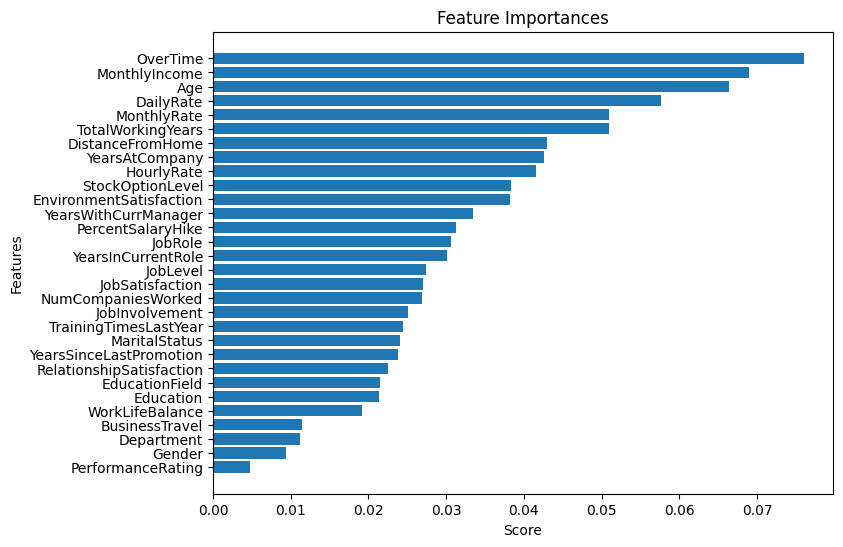

In [ ]:
list_of_feature = list(X.columns)
sorted_indices = np.argsort(model.feature_importances_)

plt.figure(figsize=(8, 6))
plt.barh(range(len(list_of_feature)), model.feature_importances_[sorted_indices])
plt.yticks(np.arange(len(list_of_feature)), np.array(list_of_feature)[sorted_indices])
plt.ylabel('Features')
plt.xlabel('Score')
plt.title('Feature Importances')
plt.show()


k-fold Cross Validation

In [ ]:
scores = cross_val_score(model, xtrain_scaled, y_train, cv=5, scoring="accuracy")
print('Cross Validation Score = ', scores)

Cross Validation Score =  [0.96099291 0.97864769 0.97153025 0.97153025 0.93594306]


In [ ]:
Avg_model_score = scores.mean()
print('Average Model Score = ', Avg_model_score)

Average Model Score =  0.963728830670604


### Hyperparameter Tuning

In [ ]:
# list of parameters

parameters = {
    'n_estimators' : [50, 100],
    'max_features' : ['sqrt', 'log2', None]
}

In [ ]:
# search best parameters
grid_search = GridSearchCV(estimator = model, param_grid = parameters)

In [ ]:
grid_search.fit(xtrain_scaled, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [ ]:
# best parameters
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 50}

Building new model with best parameters

In [ ]:
model_new = RandomForestClassifier(max_features = 'log2', n_estimators =50)

In [ ]:
model_new.fit(xtrain_scaled, y_train)

RandomForestClassifier(max_features='log2', n_estimators=50)

K fold cross validation: k=5

In [ ]:
scores = cross_val_score(model_new, xtrain_scaled, y_train, cv=5, scoring="accuracy")
print('Cross Validation Score = ', scores)

Cross Validation Score =  [0.96453901 0.97864769 0.96797153 0.97864769 0.93238434]


In [ ]:
Avg_model_score = scores.mean()
print('Average Model Score = ', Avg_model_score)

Average Model Score =  0.96443805052876


## Conclusion

lima faktor utama yang mempengaruhi Attrition yaitu Overtime, MonthlyIncome, Age, DailyRate, MonthlyRate

## Recomendation Action

Overtime dan MonthlyIncome dua faktor utama yang berdekatan. Maka dari itu, karyawan yang lembur harus diberikan upah tambahan yang sesuai
